In [1]:
#load the dataset
import pandas as pd
df=pd.read_csv(r"C:\Users\91808\Downloads\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Display first few rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


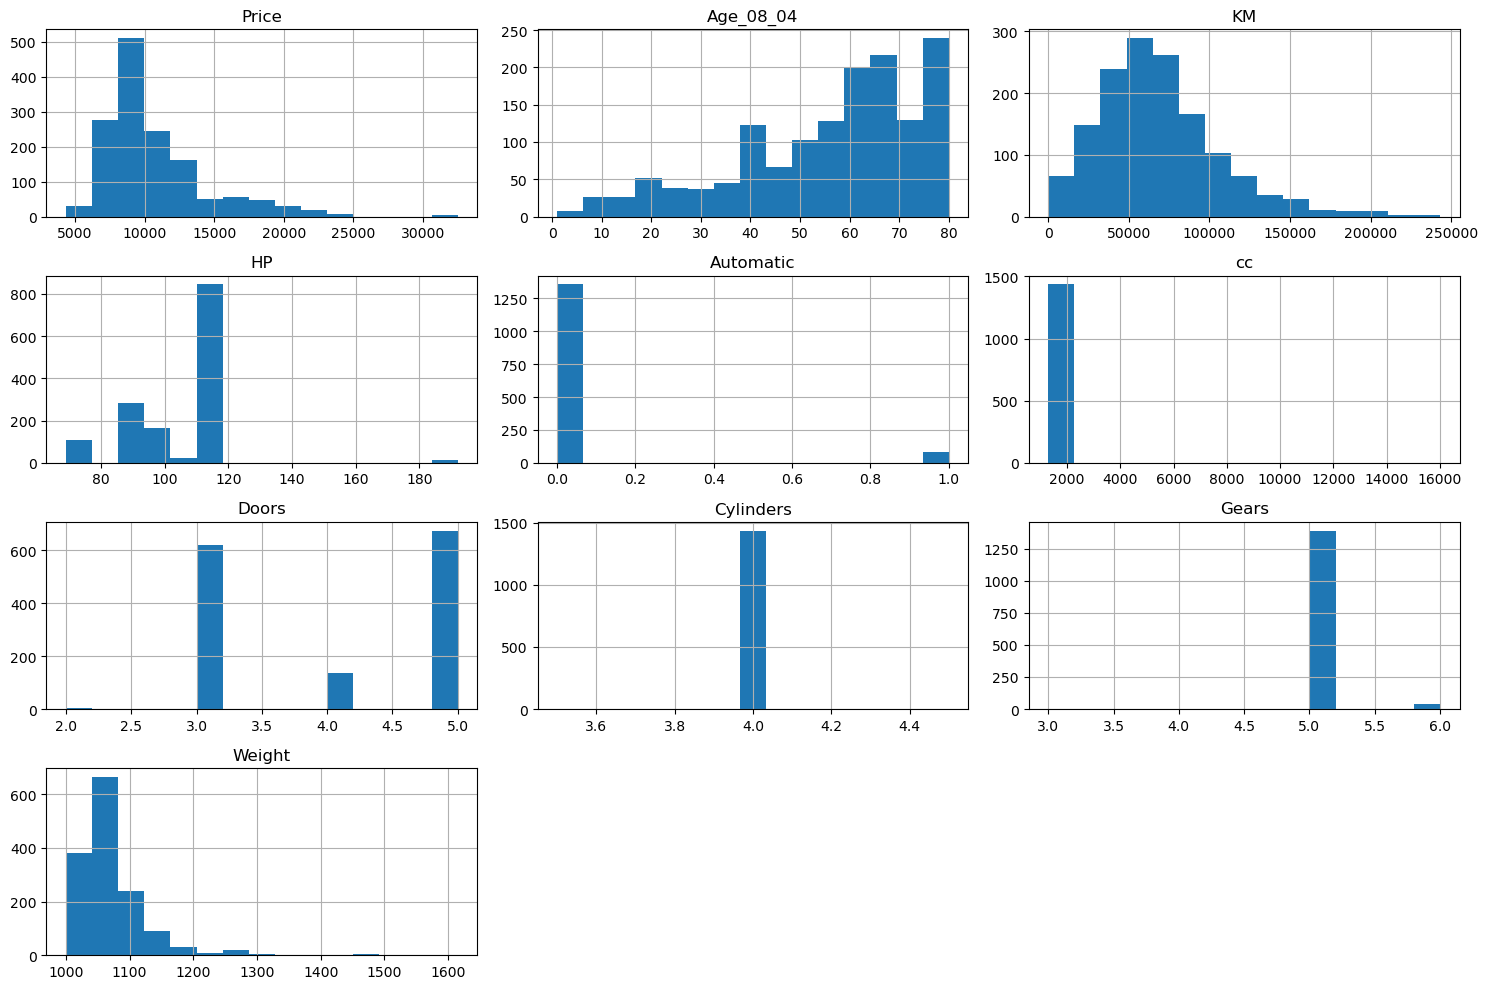

In [7]:
# Visualize numeric distributions
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

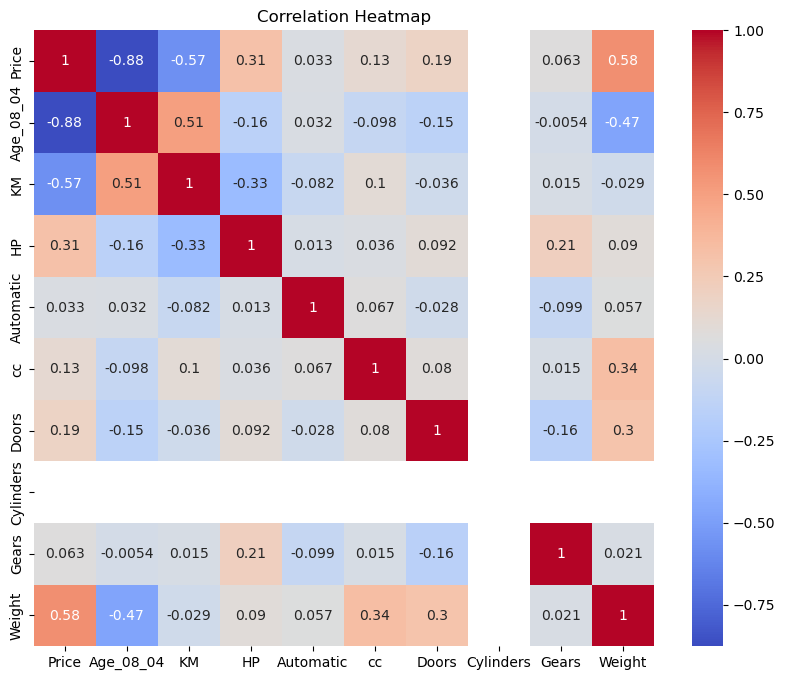

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

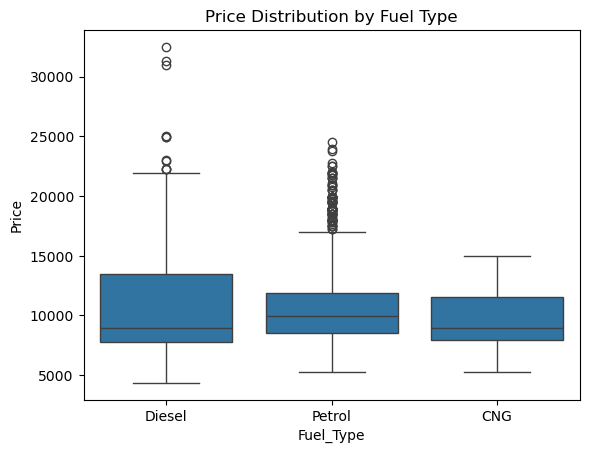

In [9]:
# Boxplot of Price by FuelType
sns.boxplot(data=df, x= 'Fuel_Type', y='Price')
plt.title("Price Distribution by Fuel Type")
plt.show()

In [20]:
# Convert categorical variable Fuel_Type to dummy/one-hot encoded columns
df_encoded = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Define feature set and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Extract coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_})
print(coefficients)


             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders  3.694822e-13
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03


In [21]:
# Optional: drop a less important feature like 'Doors'
X2 = X.drop('Doors', axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

print(pd.DataFrame({'Feature': X2.columns, 'Coefficient': model2.coef_}))

            Feature   Coefficient
0         Age_08_04 -1.209350e+02
1                KM -1.642474e-02
2                HP  1.467999e+01
3         Automatic  1.783356e+02
4                cc -3.401079e-02
5         Cylinders  1.193712e-12
6             Gears  6.071349e+02
7            Weight  2.516568e+01
8  Fuel_Type_Diesel -4.184549e+00
9  Fuel_Type_Petrol  1.337378e+03


In [22]:
from sklearn.feature_selection import RFE

selector = RFE(LinearRegression(), n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

# Build model
model3 = LinearRegression()
model3.fit(X_train[selected_features], y_train)


Selected Features: Index(['Automatic', 'Doors', 'Gears', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype='object')


LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_t, y_t):
    predictions = model.predict(X_t)
    mse = mean_squared_error(y_t, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_t, predictions)
    r2 = r2_score(y_t, predictions)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Evaluate all models
eval1 = evaluate_model(model1, X_test, y_test)
eval2 = evaluate_model(model2, X2_test, y2_test)
eval3 = evaluate_model(model3, X_test[selected_features], y_test)

print("Model 1:", eval1)
print("Model 2:", eval2)
print("Model 3:", eval3)

Model 1: {'RMSE': 1484.2654153296517, 'MAE': 990.8872739193927, 'R2': 0.8348888040611082}
Model 2: {'RMSE': 1478.9008317943894, 'MAE': 996.4345054725547, 'R2': 0.836080170652289}
Model 3: {'RMSE': 3514.498420085203, 'MAE': 2518.303943424662, 'R2': 0.07427905144344782}


In [24]:
from sklearn.linear_model import Lasso, Ridge

# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_eval = evaluate_model(lasso, X_test, y_test)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_eval = evaluate_model(ridge, X_test, y_test)

print("Lasso:", lasso_eval)
print("Ridge:", ridge_eval)


Lasso: {'RMSE': 1481.6839224634045, 'MAE': 990.9546616159037, 'R2': 0.8354626403967388}
Ridge: {'RMSE': 1483.154196377891, 'MAE': 990.733834202601, 'R2': 0.8351359377712331}


In [ ]:
Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
Normalization	
Definition	Rescales the data to a range [0,1]
Useful when features have different scales (especially in distance-based models like KNN)
Standardization
Transforms data to have mean=0 and std=1
Useful when data is Gaussian-like and required by algorithms like SVM, Logistic Regression

2.What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when two or more independent variables are highly correlated, making it difficult to determine the effect of each predictor.
Technique	
Remove correlated features	
Variance Inflation Factor (VIF)	
Principal Component Analysis (PCA)	
Regularization (Ridge or Lasso Regression)	